 <img src="OC.png" width="50" height="50" align="left">    

***

<center> <font size="6"> <span style='color:Blue'> P3: Concevez une application au service de la santé publique </span></font> </center>  

***

**Problématique**  
L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.
<img src="SPF.png">
**Mission**  
Nettoyer et analyser le jeu de données **Open Food Facts** pour proposer une application au service de la santé publique.  
  
**Idée d'application**  
Le Reflux GastroOesophagien (RGO): Calcul d'un **score_RGO** par produit.   
Nous avons tous ressenti au moins une fois dans notre vie une remontée de liquide acide de l'estomac dans l’œsophage et parfois dans la bouche surtout après un repas copieux = c’est un reflux gastro-œsophagien (RGO).  

En pratique, après avoir pris en photo le code barre du produit, l’application informe l’utilisateur du score_RGO associé, une note entre A et E. L’application recommande également des produits de la même catégorie, et si possible avec un meilleur score_RGO; l’utilisateur peut alors choisir des produits plus adaptés à son régime alimentaire.  

Au moins 20 % des adultes ont des symptômes occasionnels de reflux gastro-œsophagien (remontées acides, pyrosis). 10 % ont des symptômes de RGO chaque jour.   
Source: https://www.ameli.fr/assure/sante/themes/rgo-adulte/definition-symptomes-causes  

**Les recommandations pour la gestion du RGO par l’alimentation comprennent :**  

**Favorisent le RGO:** 

* Limiter les aliments gras, p. ex., les aliments frits, les produits de boulangerie élevés en gras, la crème, la crème glacée, les fromages élevés en gras, les saucisses, le bacon, les croustilles, etc. Il a été démontré que les aliments gras retardent la vidange gastrique et réduisent la pression du SOI, prolongeant ainsi la durée d’exposition de l’œsophage à l’acide gastrique et augmentant le volume d’acide qui peut remonter. Pourtant, 45g est une limite qu'il ne faudrait pas dépasser dans le cadre du régime spécial RGO
    * **saturated-fat_100g, trans-fat_100g, cholesterol_100g** : augment le RGO. mauvais pour la santé
    
* Les ballonnements peuvent être causés par une fermentation excessive dans l'intestin. Ils aggravent le reflux gastro-œsophagien en augmentant la pression dans l'abdomen. La fermentation est générée par certains types de glucides dits fermentescibles. La consommation de glucides modifie le pH de l’estomac qui devient trop acide.
    * **carbohydrates_100g** : augment le RGO.

* Autres aliments déconseillés: Produits sucrés
    * **sugars_100g** : augment le RGO. mauvais pour la santé
    
* L’excès de sel, c’est bien connu, favorise l’hypertension et les maladies cardiovasculaires. Il diminue aussi la pression du sphincter de l’œsophage et augmente donc le risque de reflux.
    * **salt_100g** : augment le RGO. mauvais pour la santé

**Diminuent le RGO:**

* Assurer une consommation adéquate de protéines. Des études préliminaires suggèrent que les protéines augmentent la pression du SOI, ce qui permet ainsi la fermeture du sphincter et réduit le reflux. Même si de plus récentes études n’appuient pas cette suggestion, maintenir une diète qui comprend des protéines faibles en gras peut quand même aider à guérir les muqueuses irritées ou les ulcères.  
    * **proteins_100g** : diminue le RGO. bon pour la santé 
        
* Pour prévenir la constipation et les ballonnements liés à la pression abdominale, il faudrait consommer au minimum 30g de fibres alimentaires par jours.
    * **fiber_100g** : diminue le RGO. bon pour la santé 
        
* Ce sont des sels (aluminium, calcium, magnésium) qui neutralisent localement l'acidité du contenu de l'estomac.     
    * **calcium_100g** : diminue le RGO. bon pour la santé 

* Pensez à consommer suffisamment d'aliments riches en vitamine C
    * **vitamin-c_100g** : diminue le RGO. bon pour la santé
        
**Sources:**

* https://badgut.org/centre-information/sante-et-nutrition/diete-pour-personnes-souffrant-de-rgo/?lang=fr#:~:text=Les%20recommandations%20pour%20la%20gestion,bacon%2C%20les%20croustilles%2C%20etc.
* https://www.passeportsante.net/fr/Nutrition/Dietes/Fiche.aspx?doc=reflux_gastro_oesophagien_diete
* https://sante.journaldesfemmes.fr/fiches-sante-du-quotidien/2542916-reflux-gastrique-rgo-causes-traitements/
* https://www.julienvenesson.fr/reflux-gastrique-aliments/
* https://www.thierrysouccar.com/sante/info/5-conseils-pour-renforcer-la-barriere-anti-reflux-2622

**Variables pertinentes pour le projet:**  
Plusieurs variables seront ainsi primordiales dans l'étude de la faisabilité de l'application et le calcul du **score_RGO**, à savoir:  
* **Favorise le RGO** + mauvais pour la santé:
   * saturated-fat_100g,
   * trans-fat_100g,
   * cholesterol_100g,
   * carbohydrates_100g,
   * sugars_100g,
   * salt_100g.
* **Diminue le RGO** + bon pour la santé:
   * proteins_100g,
   * fiber_100g,
   * calcium_100g,
   * vitamin-c_100g.

 <font size="4"> <span style="font-size: 1.5em" > **Partie 2: Analyse exploratoire de données** </span> </font>

# Importation des données nettoyées et librairies Python

In [1]:
#------------------------------------------
# projet : données de Open Food Facts
# Auteur : Rim BAHROUN
# Date: Novembre 2022
# OpenClassrooms
#-------------------------------------------
# importation des librairies Python pour DS
#-------------------------------------------
import numpy as np
import pandas as pd
import csv
import scipy.stats as st
import missingno as msno #missing data visualizations
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#pour afficher 165 colonnes ou lignes minimum
pd.set_option('display.max_column', 165) 
pd.set_option('display.max_row', 165) 

In [3]:
# importation des données
data_Food = pd.read_csv('Data_cleaned.csv', delimiter='\t', low_memory=False)

In [4]:
data_Food = data_Food.iloc[:,1:]
data_Food.shape

(74235, 27)

In [5]:
data_Food.head(5)

,code,product_name,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000036252,Lion Peanut x2,"France,États-Unis",e,unknown,unknown,NaN,2015-01-25 21:35:01+00:00,2017-03-09 10:34:27+00:00,1.0,1883.00,20.00,12.50,0.324,0.0120,70.00,57.500,2.50,2.50,0.096520,0.038000,0.000255,0.06300,0.10000,0.000900,22.0,22.0
1,0000000039529,Pack de 2 Twix,"France,États-Unis",NaN,unknown,unknown,NaN,2015-01-01 21:17:31+00:00,2017-03-09 10:34:12+00:00,0.0,1481.00,4.17,1.12,0.040,0.0000,77.08,30.036,6.20,6.25,0.016713,0.243840,0.000325,0.02859,0.07592,0.000750,0.0,0.0
2,0000005200016,lentilles vertes,France,NaN,Cereals and potatoes,Legumes,Aliments et boissons à base de végétaux,2015-09-02 09:37:37+00:00,2015-09-18 10:05:52+00:00,0.0,819.76,1.06,5.62,0.000,0.0387,29.00,24.100,1.59,12.00,0.476000,0.059843,0.002801,0.02420,0.08280,0.016600,13.6,14.6
3,0000007730009,Biscuits sablés fourrage au cacao,France,NaN,Sugary snacks,Biscuits and cakes,Sablés,2016-05-09 15:07:12+00:00,2016-12-21 22:25:50+00:00,3.0,1207.80,20.06,0.98,0.260,0.0016,29.80,12.680,1.92,4.74,1.203440,0.473795,0.000191,0.01760,0.14280,0.008878,9.8,9.8
4,0000010090206,Thé de Noël aromatisé orange-cannelle,France,NaN,Beverages,Non-sugared beverages,Thés,2013-06-11 19:03:51+00:00,2015-10-17 12:03:51+00:00,0.0,819.76,1.06,5.62,0.000,0.0387,29.00,24.100,1.59,12.00,0.476000,0.059843,0.002801,0.02420,0.08280,0.016600,13.6,14.6


In [6]:
data_Food.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000
mean,1.336081,1098.975658,15.485199,5.381542,0.060425,0.016925,25.824153,15.171771,2.069124,8.120374,1.205256,0.459015,0.000595,0.022473,0.059334,0.032880,8.775483,8.554975
std,2.326844,731.404374,15.493176,7.856967,0.109938,0.019789,23.160358,18.443746,3.473455,7.318101,3.935159,1.541841,0.000757,0.017137,0.079199,0.126434,8.570303,8.933789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,487.000000,1.500000,0.400000,0.000000,0.000200,6.600000,1.500000,0.100000,2.500000,0.100000,0.039370,0.000272,0.008400,0.031720,0.001841,1.000000,1.000000
50%,0.000000,973.000000,13.190000,2.600000,0.014000,0.009400,19.000000,6.700000,1.362000,6.670000,0.476000,0.194646,0.000350,0.020600,0.038760,0.003355,10.000000,9.000000
75%,2.000000,1615.000000,24.120000,6.300000,0.100000,0.033822,36.580000,24.100000,2.340000,12.000000,1.200000,0.472441,0.000455,0.029320,0.057820,0.006601,14.000000,14.600000
max,31.000000,4000.000000,100.000000,100.000000,1.780000,0.378000,100.000000,100.000000,80.000000,90.000000,100.000000,39.370079,0.013433,0.582000,1.534000,4.200000,40.000000,36.000000


# Analyse univariée

## Variables qualitatives

### La variable : qualité nutritionnelle	

La variable 'nutrition_grade_fr' donne la qualité nutritionnelle de chaque produit (de 'a' à 'e'). 

In [7]:
df_nutrition_grade_fr = pd.DataFrame(data_Food["nutrition_grade_fr"].value_counts(dropna=False))

In [8]:
df_nutrition_grade_fr

,nutrition_grade_fr
d,16960
c,13166
NaN,12941
e,11768
a,10207
b,9193


In [6]:
# import plotly.express as px
# # la répartion du nutrition_grade_fr par rapport aux valeurs renseignées 
# df = df_nutrition_grade_fr.reset_index()
# fig = px.pie(df, values='nutrition_grade_fr', names='index',
#              title='nutrition_grade_fr')
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

Le jeu de donnée contient des produits avec differentes valeurs nutritionnelles. Toutes les classes nutritionnelles sont bien représentées dans ce jeu de données.

### La variable : catégorie de produit

La variable "main_category_fr" donne la catégorie des produits dans ce jeu de données. 

In [10]:
# Etude des catégories 
df_categories = pd.DataFrame(data_Food["main_category_fr"].value_counts(dropna=False))
print("Il y a " ,df_categories.shape[0], " catégories.")

Il y a  1353  catégories.


In [11]:
# Les 10 catégories les plus représentées dans le jeu de donnée
df_categories.head(30)

,main_category_fr
NaN,17178
Boissons,3598
Conserves,1948
Epicerie,1938
Chocolats,1853
Plats préparés,1694
Biscuits,1667
Aliments et boissons à base de végétaux,1437
Surgelés,1414
Petit-déjeuners,1372


In [12]:
df_categories_h = df_categories.head(30)
df_categories_h = pd.concat([df_categories_h, (pd.DataFrame({"main_category_fr" : {"Autre" : df_categories[10:].sum(axis=0)[0]}}))], axis= 0)
df_categories_h

,main_category_fr
NaN,17178
Boissons,3598
Conserves,1948
Epicerie,1938
Chocolats,1853
Plats préparés,1694
Biscuits,1667
Aliments et boissons à base de végétaux,1437
Surgelés,1414
Petit-déjeuners,1372


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

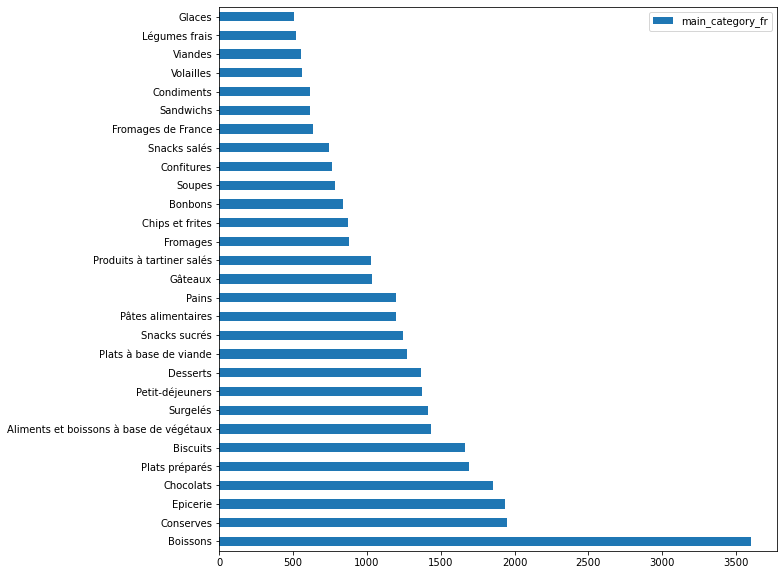

In [13]:
# df = df_categories_h.reset_index()
plt.figure()
df_categories_h.iloc[1:-1,:].plot(kind='barh',figsize=(10,10))

In [5]:
# df = df_categories_h.reset_index()
# fig = px.pie(df, values='main_category_fr', names='index',
#              title='Catégories')
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

Les catégories les plus présentes dans le jeu de données:
* Boissons
* Conserves
* Epicerie
* Chocolats
* Plats préparés.

### Les variables : pnns_groups

In [15]:
# Etude des pnns_groups_1
df_pnns_g1 = pd.DataFrame(data_Food['pnns_groups_1'].value_counts())
df_pnns_g1

,pnns_groups_1
unknown,25180
Sugary snacks,8794
Fish Meat Eggs,6312
Milk and dairy products,6073
Beverages,5953
Composite foods,5830
Cereals and potatoes,5820
Fruits and vegetables,3806
Fat and sauces,3499
Salty snacks,2023


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

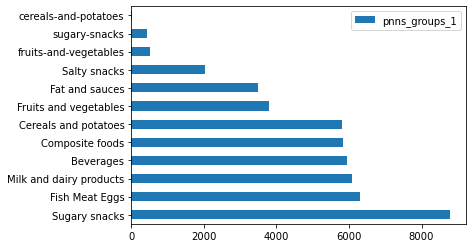

In [16]:
plt.figure()
df_pnns_g1.iloc[1:,:].plot(kind='barh')

Les groupes les plus représentés dans ce jeu de données sont: 
* Snacks sucrés,
* Poisson Viande Oeufs,
* Lait et produits laitiers,
* Boissons,
* Aliments composés,
* Céréales et pommes de terre.

In [17]:
# Etude des pnns_groups_2
df_pnns_g2 = pd.DataFrame(data_Food['pnns_groups_2'].value_counts())
df_pnns_g2.head(11)

,pnns_groups_2
unknown,23616
One-dish meals,4769
Biscuits and cakes,3590
Sweets,3114
Cereals,2905
Cheese,2851
Processed meat,2786
Dressings and sauces,2414
Non-sugared beverages,2398
Chocolate products,2090


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

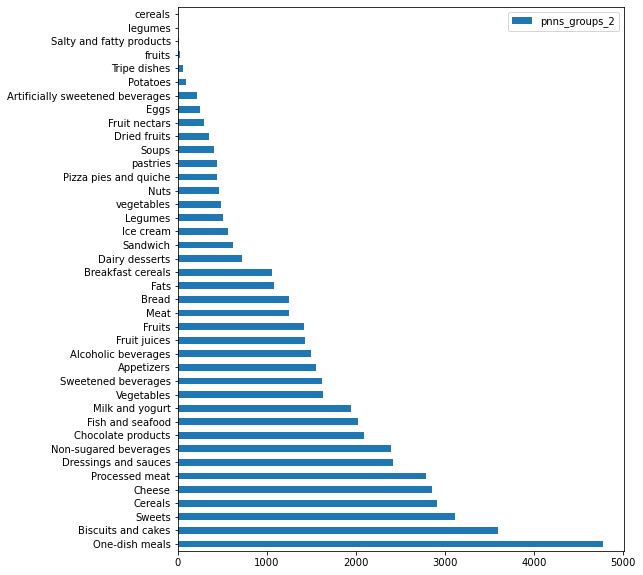

In [18]:
plt.figure()
df_pnns_g2.iloc[1:,:].plot(kind='barh',figsize=(8, 10))

Les groupes les plus représentés dans ce jeu de données sont:
* Repas à un plat,
* Biscuits et gâteaux,
* Bonbons,
* Céréales,
* Fromages.

## Variables quantitatives 

### Les variables: date de création et date de modification 

In [4]:
# fig = px.histogram(data_Food, x=['created_datetime','last_modified_datetime'],  marginal="box")
# fig.show()

Le règlement européen EU n°1169/2011, dit règlement INCO, établit les règles quant à l’information des consommateurs, leur permettant ainsi d’accéder à des informations de bases tel que la déclaration nutritionnelle ou la liste des ingrédients.  
La création de la base de données à commencer en **2012** juste arès ce règelment.    
Le Nutri-Score a été mis en place pour la première fois en France en **2017**. A partir de cette date, la base de données a été le plus modifié.  

### Les variables qui favorisent le RGO (mauvaises pour la santé)

* **Favorisent le RGO (mauvaises pour la santé):**  
    * saturated-fat_100g,
    * trans-fat_100g,
    * cholesterol_100g,
    * carbohydrates_100g,
    * sugars_100g,
    * salt_100g	

* **Diminuent le RGO (bonnes pour la santé):** 
    * proteins_100g,
    * fiber_100g,
    * calcium_100g,
    * vitamin-c_100g.

In [20]:
Favorise_RGO = ['saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g' ]
Diminue_RGO = ['proteins_100g', 'fiber_100g', 'calcium_100g', 'vitamin-c_100g']
Features_RGO = Favorise_RGO + Diminue_RGO

In [21]:
data_Food.dropna().head(2)

,code,product_name,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
8,0000040608754,"Pepsi, Nouveau goût !",France,e,Beverages,Sweetened beverages,Sodas,2012-08-15 09:48:28+00:00,2015-08-09 17:35:31+00:00,2.0,177.0,0.0,0.0,0.0,0.0,10.4,10.4,0.0,0.0,0.0254,0.01000,0.000072,0.0145,0.01590,0.000021,13.0,2.0
10,0000087177756,7Up,France,e,Beverages,Sweetened beverages,Sodas aux fruits,2015-06-06 10:28:06+00:00,2015-06-06 11:13:26+00:00,3.0,177.0,0.0,0.0,0.0,0.0,10.4,10.4,0.0,0.0,0.1000,0.03937,0.000072,0.0145,0.04466,0.000021,13.0,2.0


In [22]:
data_Food[Favorise_RGO].describe()

,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g
count,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000
mean,5.381542,0.060425,0.016925,25.824153,15.171771,1.205256
std,7.856967,0.109938,0.019789,23.160358,18.443746,3.935159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000200,6.600000,1.500000,0.100000
50%,2.600000,0.014000,0.009400,19.000000,6.700000,0.476000
75%,6.300000,0.100000,0.033822,36.580000,24.100000,1.200000
max,100.000000,1.780000,0.378000,100.000000,100.000000,100.000000


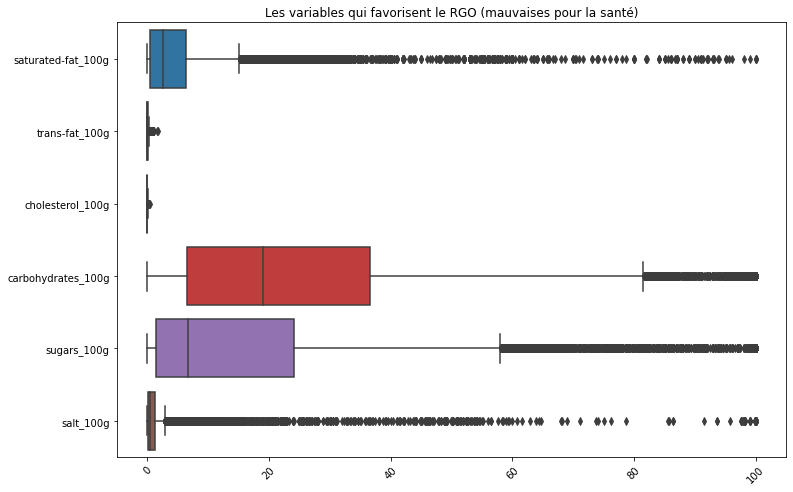

In [23]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data_Food[Favorise_RGO], orient="h")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Les variables qui favorisent le RGO (mauvaises pour la santé)")
plt.show()

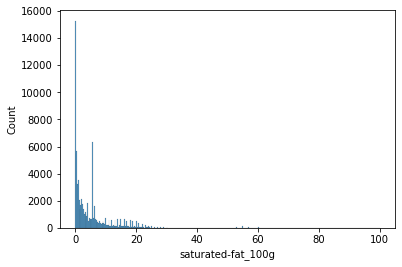

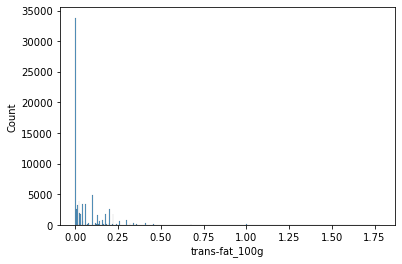

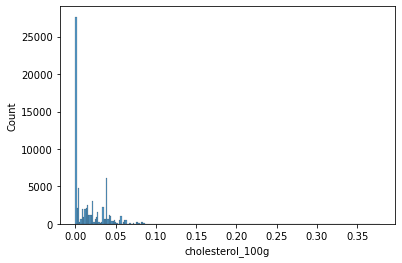

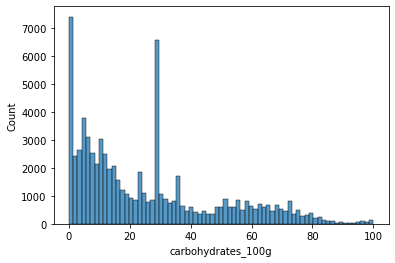

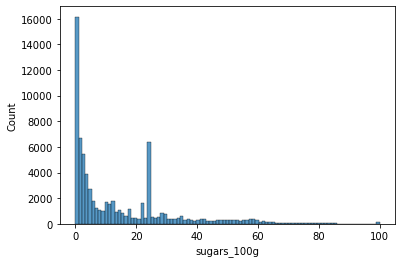

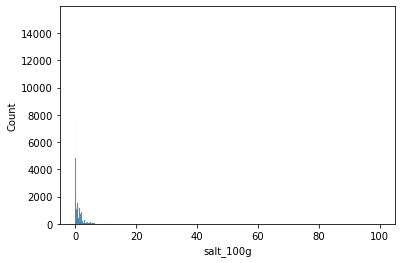

In [24]:
for col in Favorise_RGO:
    plt.figure()
    sns.histplot(data_Food[col])

**"saturated-fat_100g"**

In [3]:
# fig = px.histogram(data_Food, x="saturated-fat_100g", marginal="box")
# fig.show()

* Les gras saturés pour 100g ont une **médiane de 2.6**.  
* On remarque l'existance de valeurs satatistiquement atypiques ou aberrantes qui dépassent **16.3** soit Q3+1.5IQ. Ces valeurs ne sont pas réellement des valeurs atypiques ou abreeantes car il existe bien des produits avec des gras saturés plus que 16.3g pour 100g. Comme les huiles et les beurres. 

In [26]:
data_Food.loc[data_Food["saturated-fat_100g"]>80,:].sample(3)

,code,product_name,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
70263,8022004300728,Huile Pimentée,France,e,unknown,unknown,NaN,2017-03-11 12:46:46+00:00,2017-03-11 12:46:47+00:00,0.0,3448.0,28.4,91.3,0.22,0.0428,8.0,0.0,0.0,0.0,0.0,0.0,0.000891,0.00242,0.03312,0.001861,20.0,20.0
59144,3770002316542,Huile De Coco,France,e,unknown,unknown,NaN,2017-02-18 22:18:02+00:00,2017-02-18 22:18:03+00:00,0.0,3464.0,16.6,84.0,0.22,0.0428,8.0,0.0,0.0,0.0,0.0,0.0,0.000891,0.00242,0.03312,0.001861,20.0,20.0
60943,4260355581210,Huile De Coco Desodorisee,France,e,unknown,unknown,NaN,2017-02-20 19:52:22+00:00,2017-02-20 19:52:23+00:00,0.0,3464.0,16.6,84.0,0.22,0.0428,8.0,0.0,0.0,0.0,0.0,0.0,0.000891,0.00242,0.03312,0.001861,20.0,20.0


### Les variables qui diminuent le RGO (bonnes pour la santé)

In [27]:
data_Food[Diminue_RGO].describe()

,proteins_100g,fiber_100g,calcium_100g,vitamin-c_100g
count,74235.000000,74235.000000,74235.000000,74235.000000
mean,8.120374,2.069124,0.059334,0.022473
std,7.318101,3.473455,0.079199,0.017137
min,0.000000,0.000000,0.000000,0.000000
25%,2.500000,0.100000,0.031720,0.008400
50%,6.670000,1.362000,0.038760,0.020600
75%,12.000000,2.340000,0.057820,0.029320
max,90.000000,80.000000,1.534000,0.582000


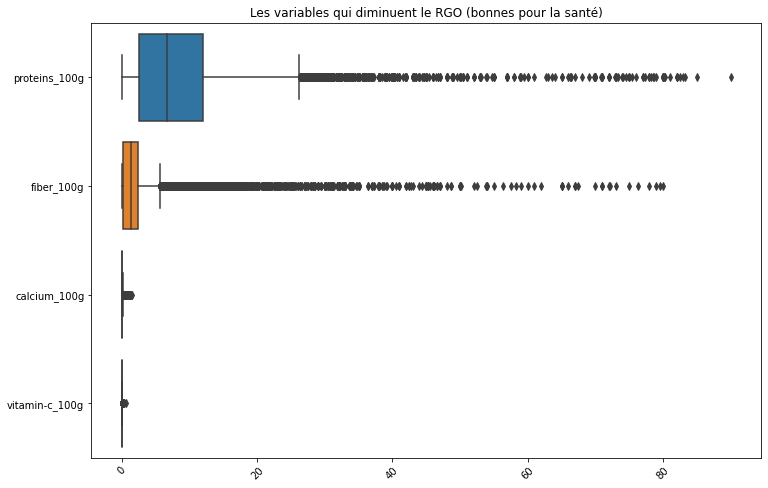

In [28]:
fig = plt.figure(figsize=(12,8))
ax = sns.boxplot(data=data_Food[Diminue_RGO], orient="h")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Les variables qui diminuent le RGO (bonnes pour la santé)")
plt.show()

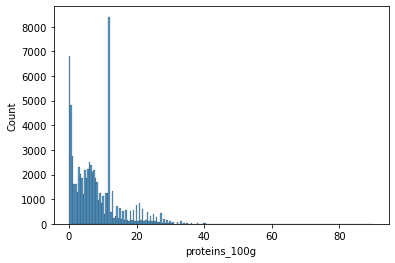

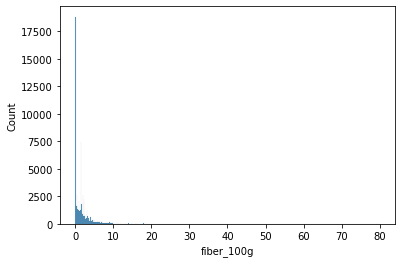

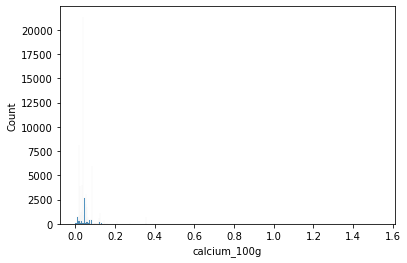

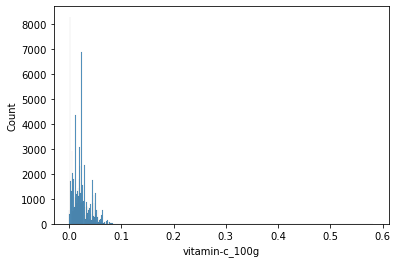

In [29]:
for col in Diminue_RGO:
    plt.figure()
    sns.histplot(data_Food[col])

# Analyse bivariée

### Les variables RGO 

Pour analyser les corrélations linéaires entre nos variables quantitatives, nous allons réaliser un **test de corrélation de Pearson** et afficher ses résultats dans un heatmap :

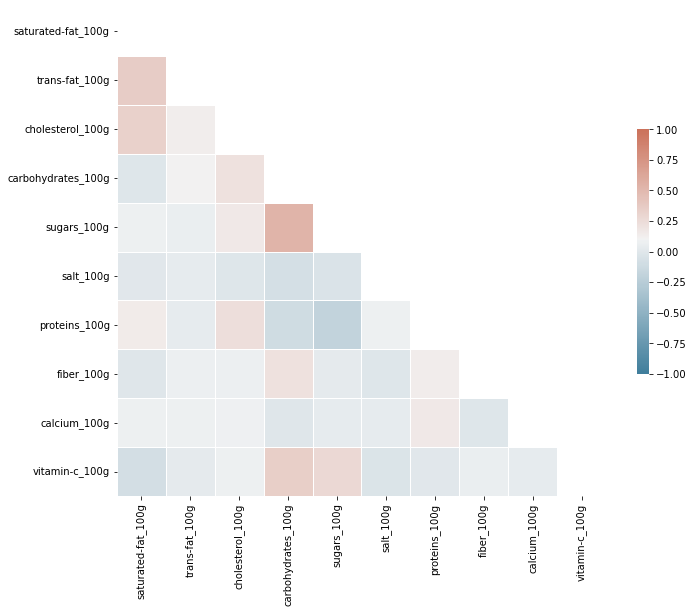

In [30]:
# Compute the correlation matrix
corr = data_Food[Features_RGO].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0.1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [31]:
data_Food[Features_RGO].corr().round(2)

,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,calcium_100g,vitamin-c_100g
saturated-fat_100g,1.00,0.36,0.33,-0.02,0.07,0.00,0.15,-0.00,0.08,-0.08
trans-fat_100g,0.36,1.00,0.13,0.11,0.06,0.04,0.03,0.06,0.08,0.03
cholesterol_100g,0.33,0.13,1.00,0.22,0.17,-0.02,0.23,0.07,0.09,0.07
carbohydrates_100g,-0.02,0.11,0.22,1.00,0.53,-0.07,-0.11,0.22,-0.00,0.34
sugars_100g,0.07,0.06,0.17,0.53,1.00,-0.04,-0.19,0.03,0.03,0.28
salt_100g,0.00,0.04,-0.02,-0.07,-0.04,1.00,0.08,-0.02,0.04,-0.04
proteins_100g,0.15,0.03,0.23,-0.11,-0.19,0.08,1.00,0.14,0.16,0.00
fiber_100g,-0.00,0.06,0.07,0.22,0.03,-0.02,0.14,1.00,-0.01,0.06
calcium_100g,0.08,0.08,0.09,-0.00,0.03,0.04,0.16,-0.01,1.00,0.04
vitamin-c_100g,-0.08,0.03,0.07,0.34,0.28,-0.04,0.00,0.06,0.04,1.00


La matrice de corrélation, ci-dessus, permet d'étudier la corrélation entre les différentes variables d'étude:  
* Il y a une corrélation entre les glucides (variable 'carbohydrates_100g') et le sucre (variable 'sugars_100'). Ce résultat est attendu vu que le glucide est un sucre transformé ou simple. 
* Le reste des variables semblent ne pas être corrélées entre elles. 

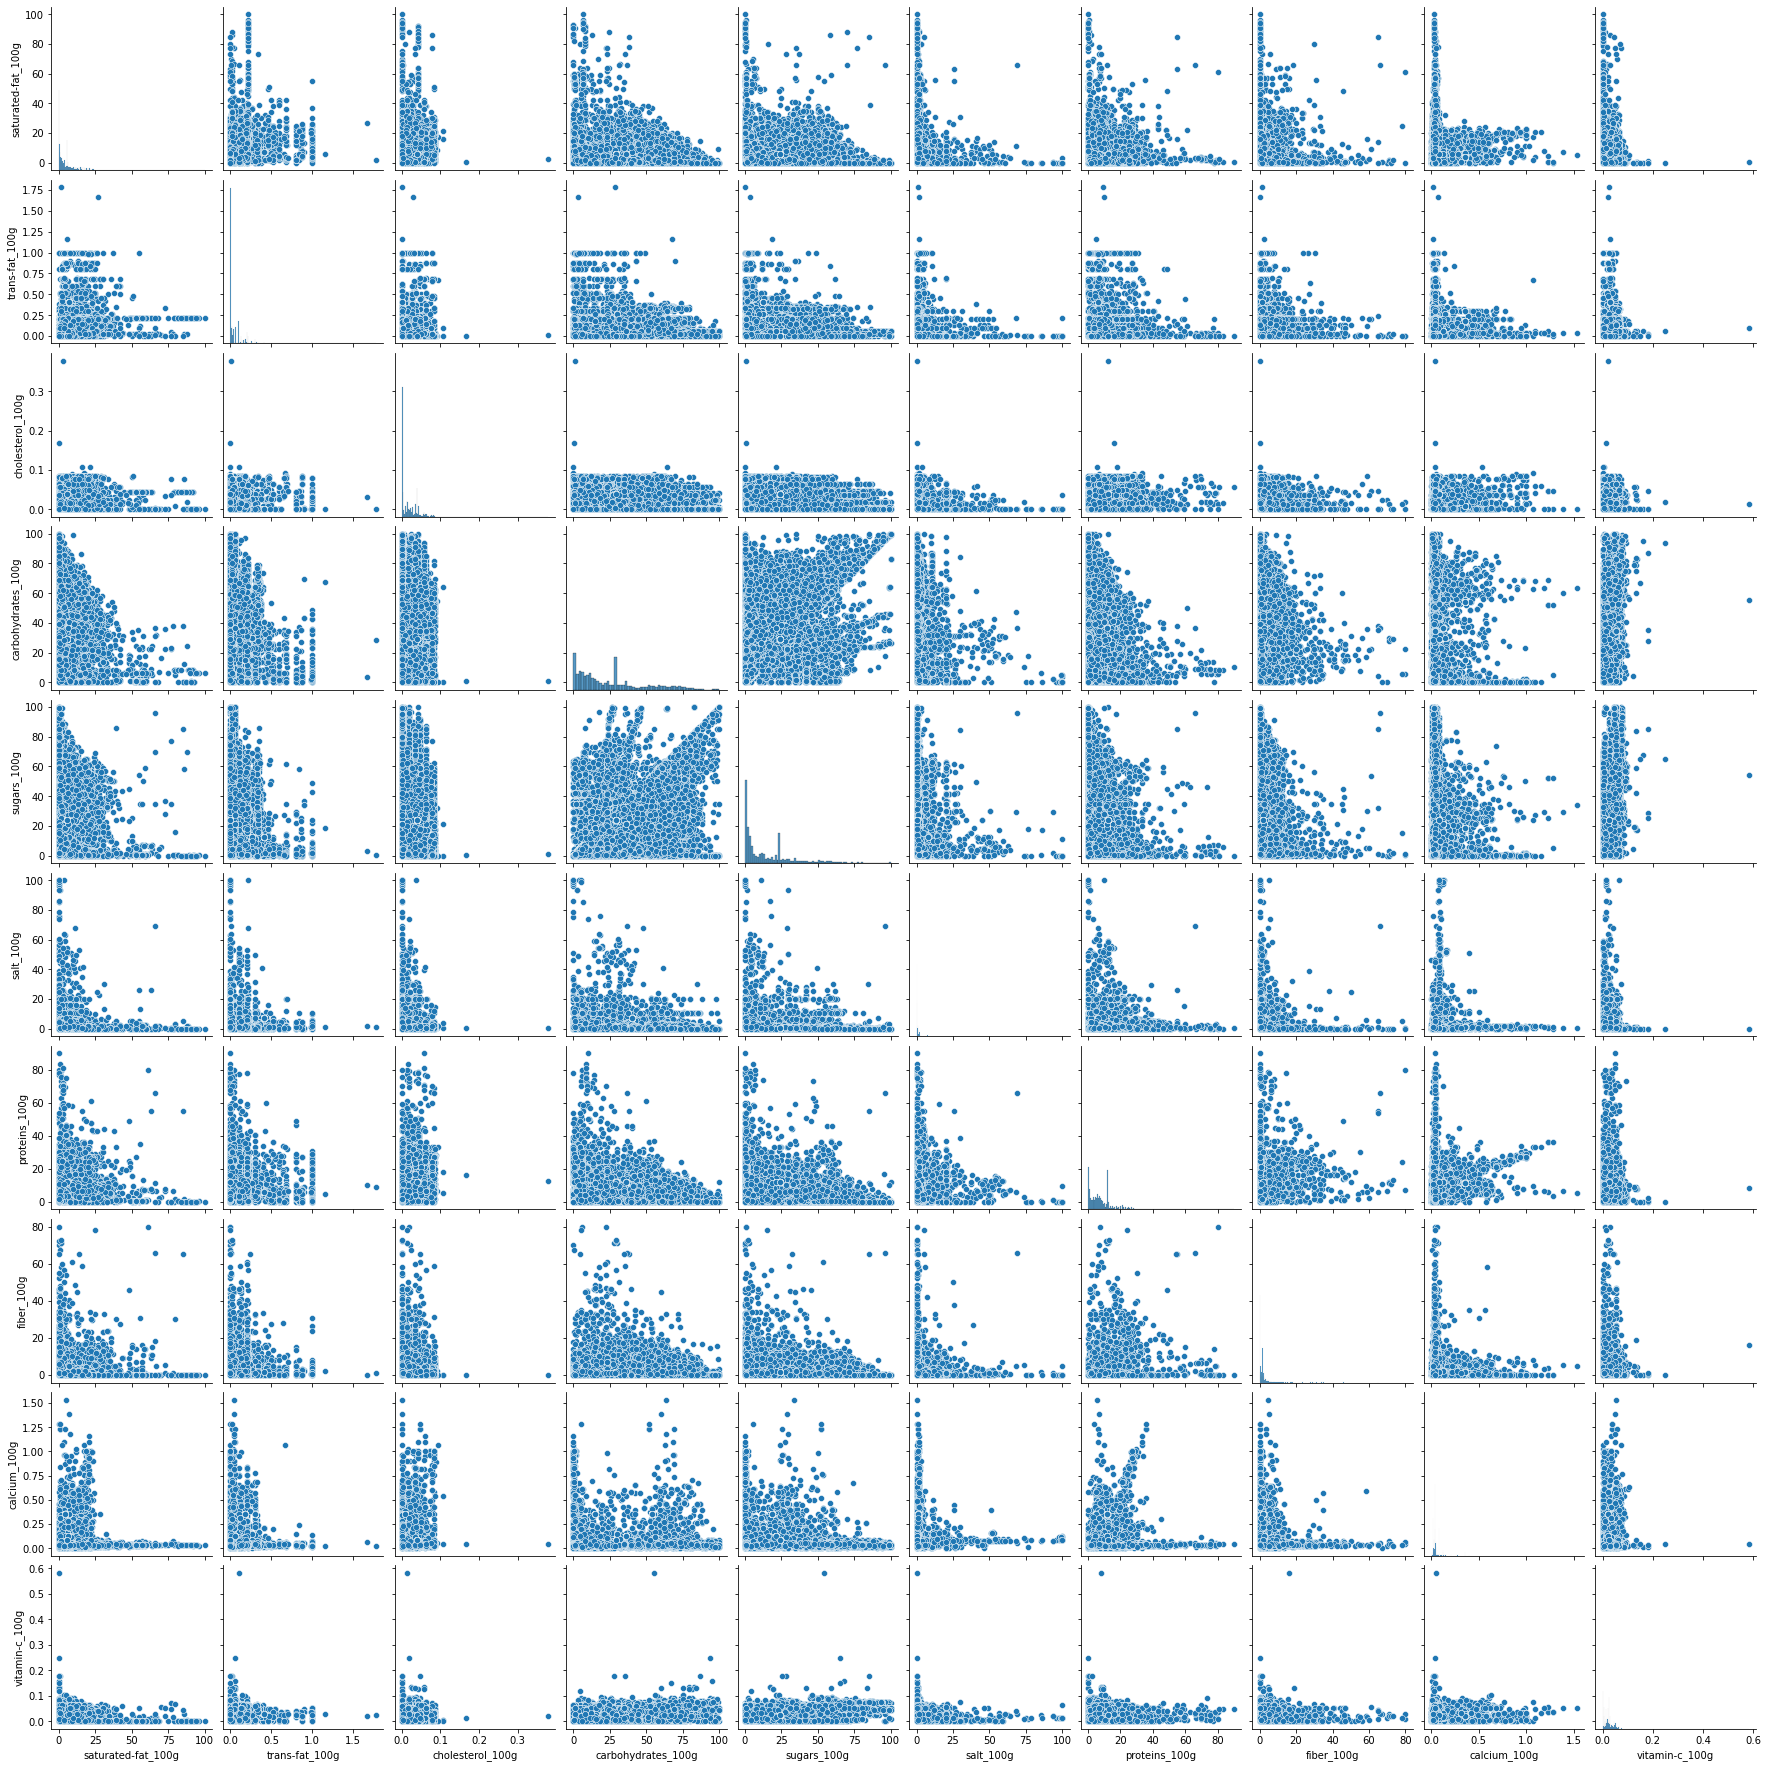

In [32]:
sns.pairplot(data_Food[Features_RGO].sample(frac=0.5))

# Analyse multivariée

## Réduction de dimension: Analyse en composantes Principales ACP 

Analyse en composante principale (ACP) est l’une des méthodes d’analyse de données multivariées les plus utilisées.   
Elle permet d’explorer des jeux de données multidimensionnels constitués de variables quantitatives et de créer des variables synthétiques exploitables.    
Peut-on réduire la dimension de l’étude de 10 variables à moins en utilisant l’ACP sans perdre beaucoup d’information?  

In [33]:
df_num = data_Food[Features_RGO]
df_num.head(2)

,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,calcium_100g,vitamin-c_100g
0,12.50,0.324,0.012,70.00,57.500,0.096520,2.50,2.5,0.10000,0.06300
1,1.12,0.040,0.000,77.08,30.036,0.016713,6.25,6.2,0.07592,0.02859


In [34]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74235 entries, 0 to 74234
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   saturated-fat_100g  74235 non-null  float64
 1   trans-fat_100g      74235 non-null  float64
 2   cholesterol_100g    74235 non-null  float64
 3   carbohydrates_100g  74235 non-null  float64
 4   sugars_100g         74235 non-null  float64
 5   salt_100g           74235 non-null  float64
 6   proteins_100g       74235 non-null  float64
 7   fiber_100g          74235 non-null  float64
 8   calcium_100g        74235 non-null  float64
 9   vitamin-c_100g      74235 non-null  float64
dtypes: float64(10)
memory usage: 5.7 MB


pas de valeurs manquantes :)

**Standardisation des données**

In [35]:
df_num.describe()

,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,calcium_100g,vitamin-c_100g
count,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000
mean,5.381542,0.060425,0.016925,25.824153,15.171771,1.205256,8.120374,2.069124,0.059334,0.022473
std,7.856967,0.109938,0.019789,23.160358,18.443746,3.935159,7.318101,3.473455,0.079199,0.017137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000200,6.600000,1.500000,0.100000,2.500000,0.100000,0.031720,0.008400
50%,2.600000,0.014000,0.009400,19.000000,6.700000,0.476000,6.670000,1.362000,0.038760,0.020600
75%,6.300000,0.100000,0.033822,36.580000,24.100000,1.200000,12.000000,2.340000,0.057820,0.029320
max,100.000000,1.780000,0.378000,100.000000,100.000000,100.000000,90.000000,80.000000,1.534000,0.582000


In [36]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

In [37]:
ddf_num_scaled = pd.DataFrame(df_num_scaled,columns=df_num.columns)

In [38]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 10

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(ddf_num_scaled)

PCA(n_components=10)

In [39]:
pca.explained_variance_ratio_

array([0.19862358, 0.16571127, 0.11516182, 0.1031588 , 0.09799906,
       0.08898597, 0.07903447, 0.05601135, 0.05537379, 0.03993989])

In [40]:
pca.explained_variance_ratio_.cumsum()

array([0.19862358, 0.36433485, 0.47949667, 0.58265548, 0.68065454,
       0.7696405 , 0.84867497, 0.90468632, 0.96006011, 1.        ])

In [41]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

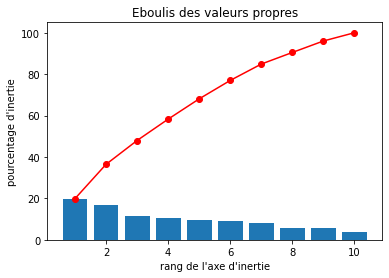

In [42]:
display_scree_plot(pca) 

Afin d’avoir un aperçu du nombre de composantes nécessaire à l’analyse, nous projetons l’éboulis des valeurs propres.  
Le premier plan factoriel couvrira une inertie de 36.43% et le second plan : 47.94%. On obtient 80% à partir de 7 composantes sur 10. Une réduction de dimension n'est pas très intéressantes dans notre cas d'étude. 

In [43]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]

In [44]:
ddf_num_scaled.columns

Index(['saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'proteins_100g',
       'fiber_100g', 'calcium_100g', 'vitamin-c_100g'],
      dtype='object')

In [45]:
pc1

array([ 0.21343559,  0.24526111,  0.3647304 ,  0.55597139,  0.50998219,
       -0.07430834,  0.00140618,  0.20012001,  0.09306858,  0.3712741 ])

In [46]:
pc2

array([ 0.51857753,  0.35467749,  0.3583873 , -0.24564025, -0.24875547,
        0.13452908,  0.46343461,  0.04369009,  0.25264887, -0.2366672 ])

In [47]:
pc3

array([-0.38759317, -0.37425368,  0.04797672,  0.07111408, -0.16800226,
        0.13297656,  0.54289676,  0.49679224,  0.23389325,  0.24534413])

In [48]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.8)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)

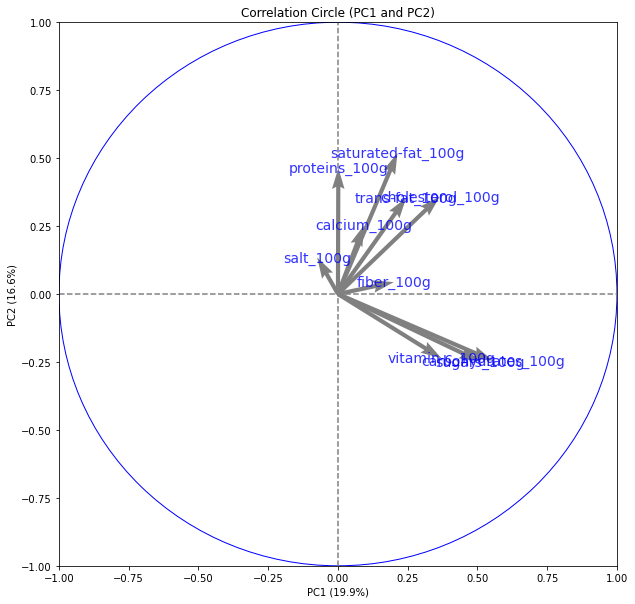

In [49]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(ddf_num_scaled.columns)) 

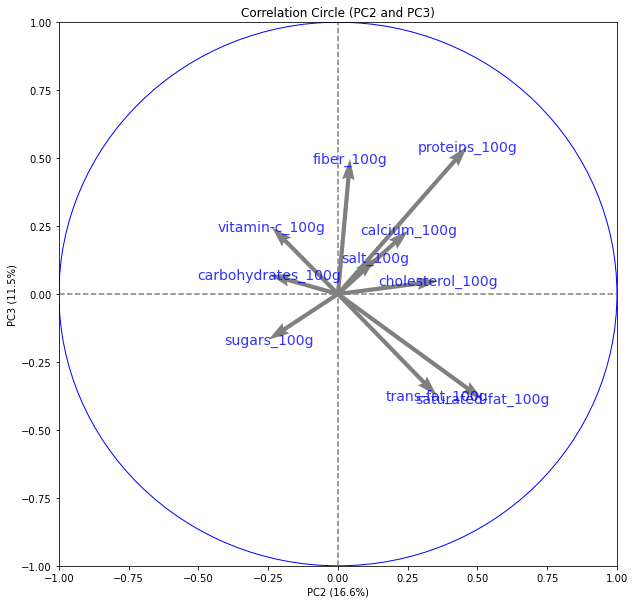

In [50]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(1,2)], labels = np.array(ddf_num_scaled.columns),) 

In [51]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

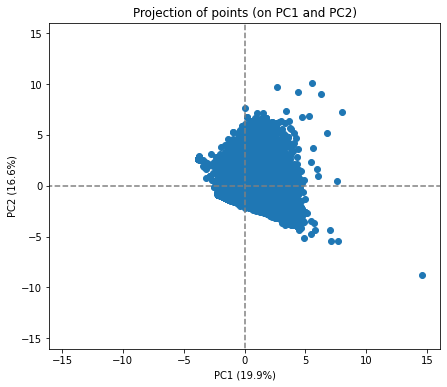

In [52]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(ddf_num_scaled) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, num_components, pca, [(0,1)])
plt.show()

**Conclusion sur L'ACP:**
L'ACP n'est pas intéressante dans notre cas vu qu'on dispose de 10 variables initialements et on aura besoin de 7 composantes pour avoir 80% d'inertie. 

# RGO-scan

## Calcul du RGO-score/RGO-grade

* **Favorisent le RGO (mauvaises pour la santé):**  
    * saturated-fat_100g,
    * trans-fat_100g,
    * cholesterol_100g,
    * carbohydrates_100g,
    * sugars_100g,
    * salt_100g	

* **Diminuent le RGO (bonnes pour la santé):** 
    * proteins_100g,
    * fiber_100g,
    * calcium_100g,
    * vitamin-c_100g.

In [53]:
Favorise_RGO = ['saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g' ]
Diminue_RGO = ['proteins_100g', 'fiber_100g', 'calcium_100g', 'vitamin-c_100g']
Features_RGO = Favorise_RGO + Diminue_RGO

In [54]:
Features_RGO

['saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'salt_100g',
 'proteins_100g',
 'fiber_100g',
 'calcium_100g',
 'vitamin-c_100g']

In [55]:
 data_Food.head(2)

,code,product_name,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000036252,Lion Peanut x2,"France,États-Unis",e,unknown,unknown,NaN,2015-01-25 21:35:01+00:00,2017-03-09 10:34:27+00:00,1.0,1883.0,20.00,12.50,0.324,0.012,70.00,57.500,2.5,2.50,0.096520,0.03800,0.000255,0.06300,0.10000,0.00090,22.0,22.0
1,0000000039529,Pack de 2 Twix,"France,États-Unis",NaN,unknown,unknown,NaN,2015-01-01 21:17:31+00:00,2017-03-09 10:34:12+00:00,0.0,1481.0,4.17,1.12,0.040,0.000,77.08,30.036,6.2,6.25,0.016713,0.24384,0.000325,0.02859,0.07592,0.00075,0.0,0.0


In [56]:
# DataFrame avec que les RGO features
data_RGO = data_Food.copy()
data_RGO.index = data_RGO.code
data_RGO = data_RGO[Features_RGO]
data_RGO

,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,calcium_100g,vitamin-c_100g
code,,,,,,,,,,
0000000036252,12.50,0.324,0.0120,70.00,57.500,0.096520,2.50,2.50,0.10000,0.06300
0000000039529,1.12,0.040,0.0000,77.08,30.036,0.016713,6.25,6.20,0.07592,0.02859
0000005200016,5.62,0.000,0.0387,29.00,24.100,0.476000,12.00,1.59,0.08280,0.02420
0000007730009,0.98,0.260,0.0016,29.80,12.680,1.203440,4.74,1.92,0.14280,0.01760
0000010090206,5.62,0.000,0.0387,29.00,24.100,0.476000,12.00,1.59,0.08280,0.02420
...,...,...,...,...,...,...,...,...,...,...
9847548283004,0.60,0.040,0.0002,74.80,2.600,0.680000,13.00,5.90,0.03876,0.02820
9900000000233,3.73,0.220,0.0131,13.52,3.890,0.100000,21.22,12.20,0.02574,0.00242
9900010011557,5.62,0.000,0.0387,29.00,24.100,0.476000,12.00,1.59,0.08280,0.02420


In [57]:
data_RGO.describe()

,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,calcium_100g,vitamin-c_100g
count,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000
mean,5.381542,0.060425,0.016925,25.824153,15.171771,1.205256,8.120374,2.069124,0.059334,0.022473
std,7.856967,0.109938,0.019789,23.160358,18.443746,3.935159,7.318101,3.473455,0.079199,0.017137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000200,6.600000,1.500000,0.100000,2.500000,0.100000,0.031720,0.008400
50%,2.600000,0.014000,0.009400,19.000000,6.700000,0.476000,6.670000,1.362000,0.038760,0.020600
75%,6.300000,0.100000,0.033822,36.580000,24.100000,1.200000,12.000000,2.340000,0.057820,0.029320
max,100.000000,1.780000,0.378000,100.000000,100.000000,100.000000,90.000000,80.000000,1.534000,0.582000


**Scaling**

In [58]:
# Min Max scaler 
scaler = preprocessing.MinMaxScaler() 
arr_scaled = scaler.fit_transform(data_RGO) 
data_RGO_scaled = pd.DataFrame(arr_scaled, columns=data_RGO.columns, index=data_RGO.index)
data_RGO_scaled

,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,calcium_100g,vitamin-c_100g
code,,,,,,,,,,
0000000036252,0.1250,0.182022,0.031746,0.7000,0.57500,0.000965,0.027778,0.031250,0.065189,0.108247
0000000039529,0.0112,0.022472,0.000000,0.7708,0.30036,0.000167,0.069444,0.077500,0.049492,0.049124
0000005200016,0.0562,0.000000,0.102381,0.2900,0.24100,0.004760,0.133333,0.019875,0.053977,0.041581
0000007730009,0.0098,0.146067,0.004233,0.2980,0.12680,0.012034,0.052667,0.024000,0.093090,0.030241
0000010090206,0.0562,0.000000,0.102381,0.2900,0.24100,0.004760,0.133333,0.019875,0.053977,0.041581
...,...,...,...,...,...,...,...,...,...,...
9847548283004,0.0060,0.022472,0.000529,0.7480,0.02600,0.006800,0.144444,0.073750,0.025267,0.048454
9900000000233,0.0373,0.123596,0.034656,0.1352,0.03890,0.001000,0.235778,0.152500,0.016780,0.004158
9900010011557,0.0562,0.000000,0.102381,0.2900,0.24100,0.004760,0.133333,0.019875,0.053977,0.041581


In [59]:
data_RGO_scaled.describe()

,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,calcium_100g,vitamin-c_100g
count,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000,74235.000000
mean,0.053815,0.033946,0.044776,0.258242,0.151718,0.012053,0.090226,0.025864,0.038680,0.038613
std,0.078570,0.061763,0.052351,0.231604,0.184437,0.039352,0.081312,0.043418,0.051629,0.029445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004000,0.000000,0.000529,0.066000,0.015000,0.001000,0.027778,0.001250,0.020678,0.014433
50%,0.026000,0.007865,0.024868,0.190000,0.067000,0.004760,0.074111,0.017025,0.025267,0.035395
75%,0.063000,0.056180,0.089476,0.365800,0.241000,0.012000,0.133333,0.029250,0.037692,0.050378
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


On calcule Score_RGO comme la moyenne des variables qui diminuent le reflux moins la moyenne des variables qui favorisent le reflux. Plus le Score_RGO est grand plus l'aliment est bien à consommer dans le cadre d'un régime anti reflux gastrique.

In [60]:
data_RGO_scaled['Score_RGO'] = (- data_RGO_scaled[Favorise_RGO].mean(axis=1) + data_RGO_scaled[Diminue_RGO].mean(axis=1))

In [61]:
data_RGO_scaled

,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,calcium_100g,vitamin-c_100g,Score_RGO
code,,,,,,,,,,,
0000000036252,0.1250,0.182022,0.031746,0.7000,0.57500,0.000965,0.027778,0.031250,0.065189,0.108247,-0.211006
0000000039529,0.0112,0.022472,0.000000,0.7708,0.30036,0.000167,0.069444,0.077500,0.049492,0.049124,-0.122777
0000005200016,0.0562,0.000000,0.102381,0.2900,0.24100,0.004760,0.133333,0.019875,0.053977,0.041581,-0.053532
0000007730009,0.0098,0.146067,0.004233,0.2980,0.12680,0.012034,0.052667,0.024000,0.093090,0.030241,-0.049490
0000010090206,0.0562,0.000000,0.102381,0.2900,0.24100,0.004760,0.133333,0.019875,0.053977,0.041581,-0.053532
...,...,...,...,...,...,...,...,...,...,...,...
9847548283004,0.0060,0.022472,0.000529,0.7480,0.02600,0.006800,0.144444,0.073750,0.025267,0.048454,-0.061988
9900000000233,0.0373,0.123596,0.034656,0.1352,0.03890,0.001000,0.235778,0.152500,0.016780,0.004158,0.040529
9900010011557,0.0562,0.000000,0.102381,0.2900,0.24100,0.004760,0.133333,0.019875,0.053977,0.041581,-0.053532


In [62]:
data_Food.head(2)

,code,product_name,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000036252,Lion Peanut x2,"France,États-Unis",e,unknown,unknown,NaN,2015-01-25 21:35:01+00:00,2017-03-09 10:34:27+00:00,1.0,1883.0,20.00,12.50,0.324,0.012,70.00,57.500,2.5,2.50,0.096520,0.03800,0.000255,0.06300,0.10000,0.00090,22.0,22.0
1,0000000039529,Pack de 2 Twix,"France,États-Unis",NaN,unknown,unknown,NaN,2015-01-01 21:17:31+00:00,2017-03-09 10:34:12+00:00,0.0,1481.0,4.17,1.12,0.040,0.000,77.08,30.036,6.2,6.25,0.016713,0.24384,0.000325,0.02859,0.07592,0.00075,0.0,0.0


In [63]:
data_Food = data_Food.merge(data_RGO_scaled['Score_RGO'],left_on='code', right_on='code') 

In [64]:
data_Food.head(2)

,code,product_name,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,Score_RGO
0,0000000036252,Lion Peanut x2,"France,États-Unis",e,unknown,unknown,NaN,2015-01-25 21:35:01+00:00,2017-03-09 10:34:27+00:00,1.0,1883.0,20.00,12.50,0.324,0.012,70.00,57.500,2.5,2.50,0.096520,0.03800,0.000255,0.06300,0.10000,0.00090,22.0,22.0,-0.211006
1,0000000039529,Pack de 2 Twix,"France,États-Unis",NaN,unknown,unknown,NaN,2015-01-01 21:17:31+00:00,2017-03-09 10:34:12+00:00,0.0,1481.0,4.17,1.12,0.040,0.000,77.08,30.036,6.2,6.25,0.016713,0.24384,0.000325,0.02859,0.07592,0.00075,0.0,0.0,-0.122777


In [65]:
data_Food["Score_RGO"].describe()

count    74235.000000
mean        -0.044079
std          0.071648
min         -0.366367
25%         -0.081280
50%         -0.032904
75%          0.004836
max          0.370401
Name: Score_RGO, dtype: float64

On utilisera les quantiles de la variables RGO_score pour obtenir le RGO_grade. 

In [66]:
data_Food["RGO_grade"] = pd.qcut(data_Food['Score_RGO'],4,labels=['RGO_D','RGO_C','RGO_B','RGO_A'])

In [67]:
data_Food.head(2)

,code,product_name,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,Score_RGO,RGO_grade
0,0000000036252,Lion Peanut x2,"France,États-Unis",e,unknown,unknown,NaN,2015-01-25 21:35:01+00:00,2017-03-09 10:34:27+00:00,1.0,1883.0,20.00,12.50,0.324,0.012,70.00,57.500,2.5,2.50,0.096520,0.03800,0.000255,0.06300,0.10000,0.00090,22.0,22.0,-0.211006,RGO_D
1,0000000039529,Pack de 2 Twix,"France,États-Unis",NaN,unknown,unknown,NaN,2015-01-01 21:17:31+00:00,2017-03-09 10:34:12+00:00,0.0,1481.0,4.17,1.12,0.040,0.000,77.08,30.036,6.2,6.25,0.016713,0.24384,0.000325,0.02859,0.07592,0.00075,0.0,0.0,-0.122777,RGO_D


## Analyse RGO_score / RGO_grade

In [2]:
# fig = px.histogram(data_Food, x="Score_RGO", marginal="box", nbins=100, color="RGO_grade")
# fig.show()

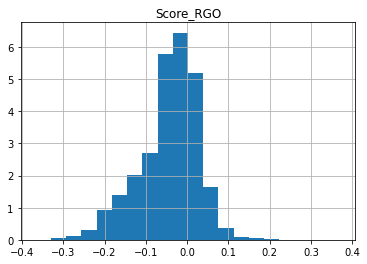

In [69]:
data_Food["Score_RGO"].hist(density=True, bins=20)
plt.title("Score_RGO")
plt.show()

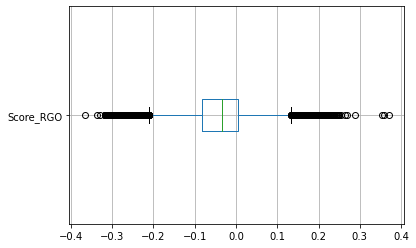

In [70]:
data_Food.boxplot(column="Score_RGO", vert=False)
plt.show()

In [71]:
data_Food.head(2)

,code,product_name,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,created_datetime,last_modified_datetime,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,Score_RGO,RGO_grade
0,0000000036252,Lion Peanut x2,"France,États-Unis",e,unknown,unknown,NaN,2015-01-25 21:35:01+00:00,2017-03-09 10:34:27+00:00,1.0,1883.0,20.00,12.50,0.324,0.012,70.00,57.500,2.5,2.50,0.096520,0.03800,0.000255,0.06300,0.10000,0.00090,22.0,22.0,-0.211006,RGO_D
1,0000000039529,Pack de 2 Twix,"France,États-Unis",NaN,unknown,unknown,NaN,2015-01-01 21:17:31+00:00,2017-03-09 10:34:12+00:00,0.0,1481.0,4.17,1.12,0.040,0.000,77.08,30.036,6.2,6.25,0.016713,0.24384,0.000325,0.02859,0.07592,0.00075,0.0,0.0,-0.122777,RGO_D


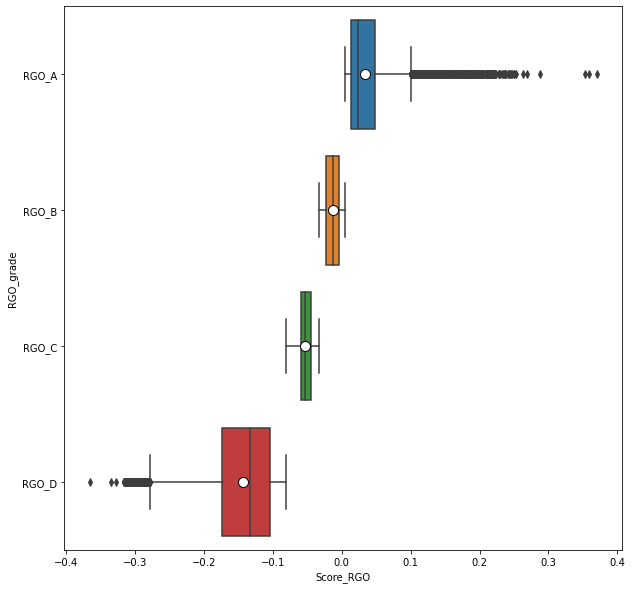

In [72]:
ordre_RGO = data_Food.groupby("RGO_grade")['Score_RGO'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="Score_RGO", 
            y="RGO_grade", 
           # showfliers=False,
            orient='h', 
            order=['RGO_A','RGO_B','RGO_C','RGO_D'], 
            data=data_Food,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

## Analyse RGO_score/RGO_grade VS main_category_fr 

In [73]:
categories_list = df_categories_h.iloc[1:-1,:].index

In [74]:
data_categories = data_Food.loc[data_Food['main_category_fr'].isin(categories_list),:]

<AxesSubplot:xlabel='count', ylabel='main_category_fr'>

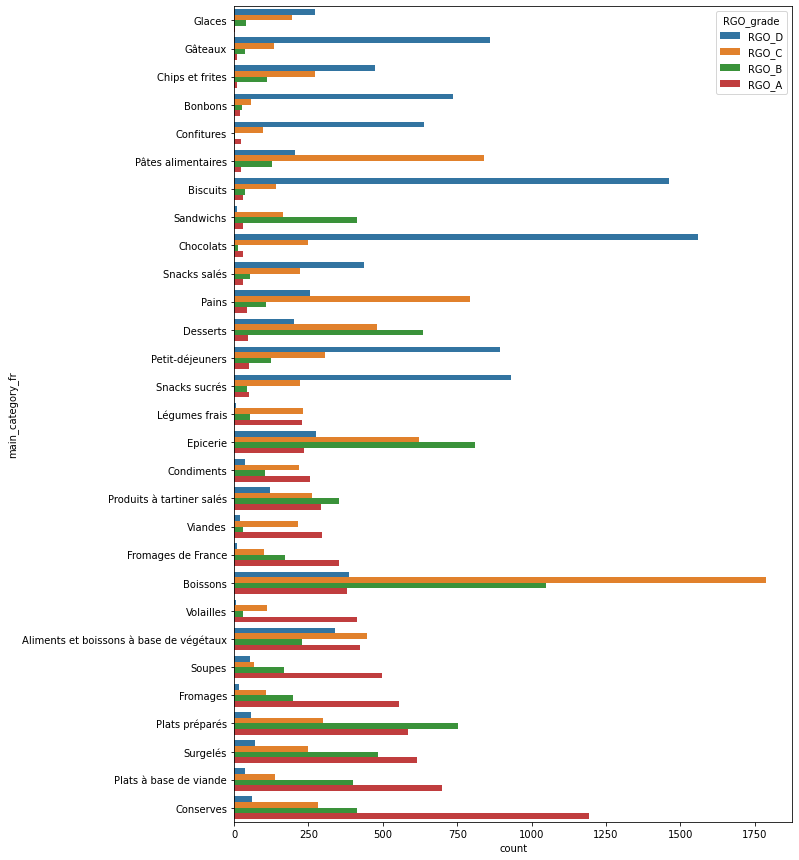

In [75]:
filtre_meilleur_RGO = data_categories['RGO_grade'] == 'RGO_A'
ordre_RGO = data_categories[filtre_meilleur_RGO].groupby('main_category_fr')['RGO_grade'].count().sort_values().index


plt.figure(figsize=(10, 15))
sns.countplot(y='main_category_fr', hue='RGO_grade', data=data_categories, order=ordre_RGO)

* Le RGO_A domine pour les catégories: conserves, Plats à base de viande et surgelés. 
* Le RGO_D domine pour les catégories: gâteaux, Chips et Frites et bonbons.

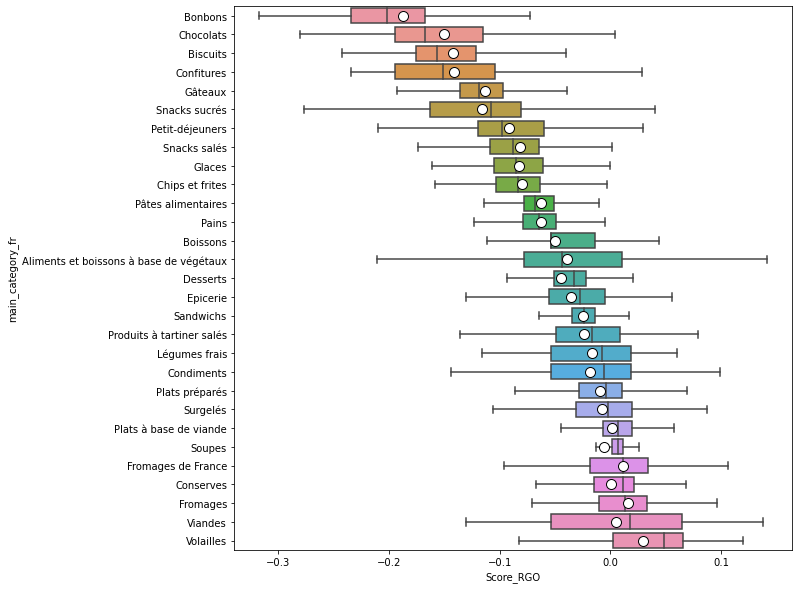

In [76]:
ordre_RGO = data_categories.groupby('main_category_fr')['Score_RGO'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x='Score_RGO', 
            y='main_category_fr', 
            showfliers=False,
            orient='h', 
            order=ordre_RGO, 
            data=data_categories,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

## Analyse RGO_score/RGO_grade VS nutri-score/nutri_grade

Rappel: Le calcul du nutri-score se base sur les variables suivantes: Energy, Sucre, Gras saturé, Sel et Protéines, Fibres, Fruits et légumes.

In [77]:
pd.crosstab(data_Food['nutrition_grade_fr'],data_Food['RGO_grade'])

RGO_grade,RGO_D,RGO_C,RGO_B,RGO_A
nutrition_grade_fr,,,,
a,550,2060,2737,4860
b,560,865,4110,3658
c,1877,2579,5209,3501
d,6273,3458,3279,3950
e,7333,976,2165,1294


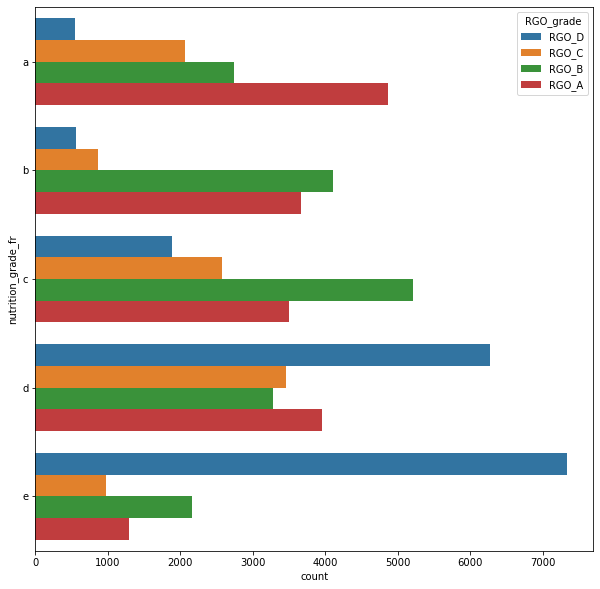

In [78]:
plt.figure(figsize=(10, 10))
sns.countplot(y='nutrition_grade_fr', hue='RGO_grade', data=data_Food, order=['a','b','c','d','e']);

On observe que le RGO_A domine le nutri-score A et le RGO_D domine le nutri-score E.

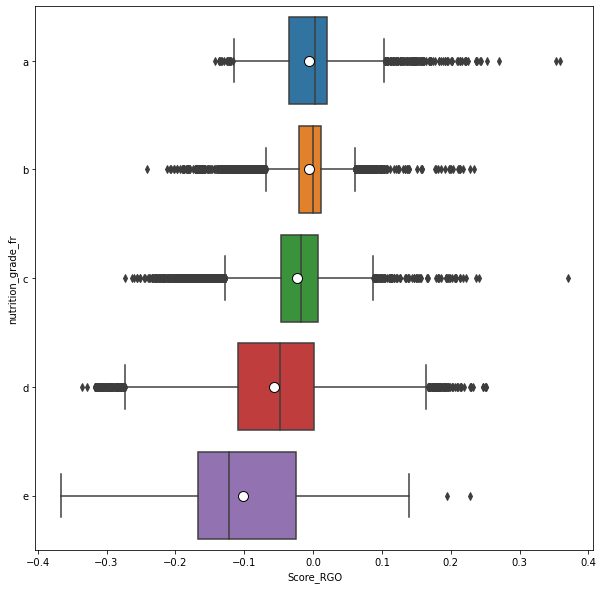

In [79]:
ordre_RGO = data_Food.groupby('nutrition_grade_fr')['Score_RGO'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="Score_RGO", 
            y="nutrition_grade_fr", 
           # showfliers=False,
            orient='h', 
            order=['a','b','c','d','e'], 
            data=data_Food,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

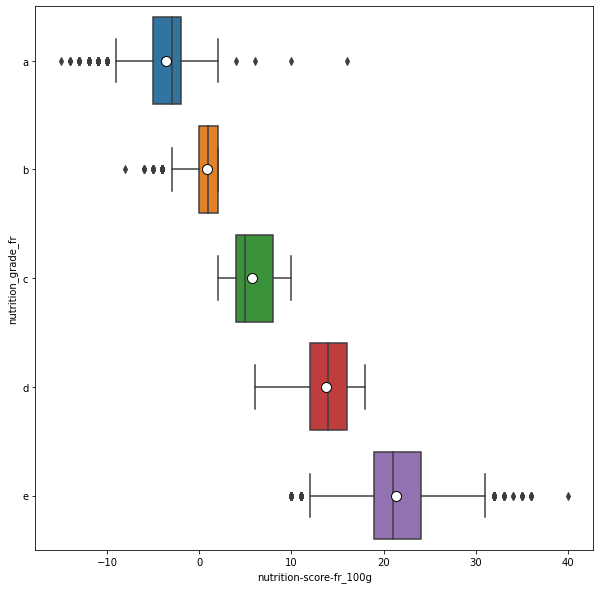

In [80]:
ordre_RGO = data_Food.groupby('nutrition_grade_fr')["nutrition-score-fr_100g"].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="nutrition-score-fr_100g", 
            y="nutrition_grade_fr", 
           # showfliers=False,
            orient='h', 
            order=['a','b','c','d','e'], 
            data=data_Food,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

In [1]:
# fig = px.scatter(data_Food, x="nutrition-score-fr_100g", y="Score_RGO", color="RGO_grade")
# fig.show()

In [82]:
data_Food.loc[:,["nutrition-score-fr_100g","Score_RGO"]].corr().round(2)

,nutrition-score-fr_100g,Score_RGO
nutrition-score-fr_100g,1.00,-0.46
Score_RGO,-0.46,1.00


## Analyse RGOexplicative avec l'ANOVA

Afin de vérifier si la catégorie **'main_category_fr'** influence rééllement le **RGO-score**, nous pouvons réaliser une **ANOVA** (Analyse de la variance). Le choix de ce test est dû au fait que nous étudions 1 variable qualitative comparativement à une variable quantitative.  

Les hypothèses posées seront donc les suivantes :  

**H0** : La distribution des échantillons est similaire (et donc la catégorie n'a aucune influence sur le RGO-score).  
H1 : Une ou plusieurs distributions sont inégales.  
Pour commencer, nous pouvons projeter les boxplots de la répartition des RGO-scores par catégorie 'main_category_fr' : 

In [83]:
categories_list = df_categories_h.iloc[1:-1,:].index

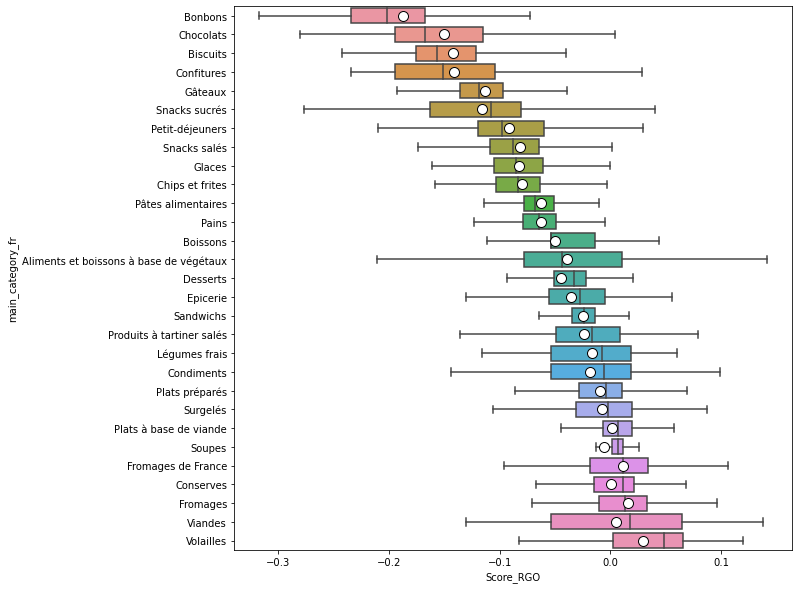

In [84]:
data_categories = data_Food.loc[data_Food['main_category_fr'].isin(categories_list),:]
ordre_RGO = data_categories.groupby('main_category_fr')['Score_RGO'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x='Score_RGO', 
            y='main_category_fr', 
            showfliers=False,
            #orient='h', 
            order=ordre_RGO,
            data=data_categories,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"});

Les points blancs au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.  

On voit ici que les Score_RGO sont différents d'une catégorie à l'autre. Mais vérifions maintenant cette affirmation par les chiffres, grâce à  l'analyse de variance : ANOVA.

In [85]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

anova_category = smf.ols('Score_RGO~main_category_fr', data=data_categories).fit()
print(anova_category.summary())

                            OLS Regression Results                            
Dep. Variable:              Score_RGO   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     1456.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:51:25   Log-Likelihood:                 54563.
No. Observations:               34145   AIC:                        -1.091e+05
Df Residuals:                   34116   BIC:                        -1.088e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [86]:
#Tableau d'analyse de variance
sm.stats.anova_lm(anova_category, typ=2)

,sum_sq,df,F,PR(>F)
main_category_fr,97.773710,28.0,1455.986951,0.0
Residual,81.820982,34116.0,NaN,NaN


Les résultats du **test de Fisher** nous indiquent ici une p-value de 0 pour l'ensemble des catégories, donc inferieur au niveau de test de 5%. Nous rejetons donc l'hypothèse H0 selon laquelle les distributions sont identiques.
**La catégorie de produit a donc bien une influence sur le RGO-score**.